In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

module_path = (Path().resolve().parent/ "Modules")
sys.path.append(str(module_path))

import my_modules, model_tuner

c:\Users\ken20\Documents\workspaces\HORSE_RACING\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../Data/train_data_JV.csv", encoding="shift-jis")
df.head()

,レースID(新),日付,開催,場所,Ｒ,馬名S,騎手コード,調教師コード,頭数,枠番,...,脚質,人気,賞金,異常コード,種牡馬,母馬,母父馬,母父タイプ名,毛色,血統登録番号
0,202506080503021211,250608,3東2,東京,12,ゴールデンオスカー,1150,1189,14,7,...,中団,7.0,1550,0,スクリーンヒーロー,バラベルサイユ,アグネスデジタル,ネイティヴダンサー系,栗毛,2021101235
1,202506080503021212,250608,3東2,東京,12,サノノワンダー,1140,1127,14,7,...,後方,1.0,620,0,ヘニーヒューズ,プレトリアン,キングヘイロー,ニアークティック系,鹿毛,2022102039
2,202506080503021209,250608,3東2,東京,12,トーホウキザン,1215,1135,14,6,...,後方,13.0,390,0,トーホウジャッカル,トーホウドルチェ,サウスヴィグラス,ネイティヴダンサー系,栗毛,2020101764
3,202506080503021202,250608,3東2,東京,12,マンダリンボレロ,1085,1031,14,2,...,先行,3.0,230,0,スピルバーグ,ジャーメイン,アドマイヤムーン,ネイティヴダンサー系,栗毛,2020101655
4,202506080503021204,250608,3東2,東京,12,グラヴィス,1163,1075,14,3,...,先行,8.0,155,0,ハーツクライ,ラヴズオンリーミー,Storm Cat,ニアークティック系,鹿毛,2021105831


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66749 entries, 0 to 66748
Data columns (total 63 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   レースID(新)     66749 non-null  int64  
 1   日付           66749 non-null  int64  
 2   開催           66749 non-null  object 
 3   場所           66749 non-null  object 
 4   Ｒ            66749 non-null  int64  
 5   馬名S          66749 non-null  object 
 6   騎手コード        66749 non-null  int64  
 7   調教師コード       66749 non-null  int64  
 8   頭数           66749 non-null  int64  
 9   枠番           66749 non-null  int64  
 10  馬番           66749 non-null  int64  
 11  クラスコード       66749 non-null  int64  
 12  トラックコード(JV)  66749 non-null  int64  
 13  ｺｰﾅｰ         66749 non-null  int64  
 14  距離           66749 non-null  object 
 15  馬場状態         66749 non-null  object 
 16  天気           66749 non-null  object 
 17  競走種別         66749 non-null  int64  
 18  性別           66749 non-null  object 
 19  年齢  

In [4]:
def preprocessing(df_to_copy):
    df = df_to_copy.copy()
    original_col = df.columns.tolist()
    df["race_id"] = df["レースID(新)"]
    df["year"] = df["日付"] // 10000
    df["month"] = df["日付"] // 100 % 100
    df["day"] = df["日付"] % 100
    df["times"] = df["開催"].str[0].astype(int)
    df["place"] = df["場所"]
    df["daily"] = df["開催"].str[2]
    df["race_num"] = df["Ｒ"]
    df["horse"] = df["馬名S"]
    df["jockey_id"] = df["騎手コード"]
    df["trainer_id"] = df["調教師コード"]
    df["horse_N"] = df["頭数"]
    df["waku_num"] = df["枠番"]
    df["horse_num"] = df["馬番"]
    df["class_code"] = df["クラスコード"]
    df["track_code"] = df["トラックコード(JV)"]
    df["corner_num"] = df["ｺｰﾅｰ"]
    df["dist"] = df["距離"].str[1:].astype(int)
    df["state"] = df["馬場状態"]
    df["weather"] = df["天気"]
    df["age_code"] = df["競走種別"]
    df["sex"] = df["性別"]
    df["age"] = df["年齢"]
    df["basis_weight"] = df["斤量"].str.replace(r'[^0-9.]', '', regex=True).astype(float)
    df["blinker"] = df["ブリンカー"]
    df["weight"] = df["馬体重"]
    df["inc_dec"] = df["馬体重増減"]
    df["weight_code"] = df["重量コード"]
    df["win_odds"] = df["単勝オッズ"]
    df["win_odds_1"] = df["指時系1・単勝"]
    df["win_odds_1_pop"] = df["指時系1・人気"]
    df["win_odds_2"] = df["指時系2・単勝"]
    df["win_odds_2_pop"] = df["指時系2・人気"]
    df["win_mul_odds_Hi"] = df["複勝オッズ上限"]
    df["win_mul_odds_Lo"] = df["複勝オッズ下限"]
    df["win_mul_odds_1_Hi"] = df["複上1"]
    df["win_mul_odds_1_Lo"] = df["指時系1・複下"]
    df["win_mul_odds_1_pop"] = df["複人気1"]
    df["win_mul_odds_2_Hi"] = df["複上2"]
    df["win_mul_odds_2_Lo"] = df["指時系2・複下"]
    df["win_mul_odds_2_pop"] = df["複人気2"]
    df["rank"] = df["確定着順"] 
    df["time_diff"] = df["着差"]
    df["time"] = df["走破タイム"]
    df["corner1_rank"] = df["1角"]
    df["corner2_rank"] = df["2角"]
    df["corner3_rank"] = df["3角"]
    df["corner4_rank"] = df["4角"]
    df["last_3F_time"] = df["上り3F"]
    df["last_3F_rank"] = df["上り3F順"]
    df["Ave_3F"]= df["Ave-3F"]
    original_col.remove("PCI")
    original_col.remove("PCI3")
    original_col.remove("RPCI")
    df["last_3F_time_diff"] = df["上3F地点差"]
    df["leg"] = df["脚質"]
    df["pop"] = df["人気"]
    df["prize"] = df["賞金"]
    df["error_code"] = df["異常コード"]
    df["father"] = df["種牡馬"]
    df["mother"] = df["母馬"]
    df["broodmare_sire"] = df["母父馬"]
    df["broodmare_sire_type"] = df["母父タイプ名"]
    df["horse_color"] = df["毛色"]
    df["id"] = df["血統登録番号"]

    df = df.drop(original_col, axis=1)

    df.info()


    return df

In [5]:
df2 = preprocessing(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66749 entries, 0 to 66748
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PCI                  66241 non-null  float64
 1   PCI3                 66749 non-null  float64
 2   RPCI                 66749 non-null  float64
 3   race_id              66749 non-null  int64  
 4   year                 66749 non-null  int64  
 5   month                66749 non-null  int64  
 6   day                  66749 non-null  int64  
 7   times                66749 non-null  int64  
 8   place                66749 non-null  object 
 9   daily                66749 non-null  object 
 10  race_num             66749 non-null  int64  
 11  horse                66749 non-null  object 
 12  jockey_id            66749 non-null  int64  
 13  trainer_id           66749 non-null  int64  
 14  horse_N              66749 non-null  int64  
 15  waku_num             66749 non-null 

In [6]:
df3 = my_modules.common_process(df2)
df3.head()

C:\Users\ken20\Documents\workspaces\HORSE_RACING\Modules\my_modules.py:71: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["place_num"] = df["place"].replace(place_dict).astype(int)


,PCI,PCI3,RPCI,year,month,day,times,place,daily,race_num,...,id,id_for_fold,field_type,flat_or_jump,turn_type,race_type,waku,datetime,target,target3
66569,43.9,39.77,37.6,2024,1,6,1,中山,1,1,...,2021103189,2024010606010101,ダート,平地,R,中山ダート1200,inner,2024-01-06 01:02:00,0,0
66555,41.1,39.77,37.6,2024,1,6,1,中山,1,1,...,2021106805,2024010606010101,ダート,平地,R,中山ダート1200,inner,2024-01-06 01:02:00,0,1
66554,38.6,39.77,37.6,2024,1,6,1,中山,1,1,...,2021105821,2024010606010101,ダート,平地,R,中山ダート1200,outer,2024-01-06 01:02:00,1,1
66558,42.4,39.77,37.6,2024,1,6,1,中山,1,1,...,2021102752,2024010606010101,ダート,平地,R,中山ダート1200,outer,2024-01-06 01:02:00,0,0
66559,41.4,39.77,37.6,2024,1,6,1,中山,1,1,...,2021100402,2024010606010101,ダート,平地,R,中山ダート1200,outer,2024-01-06 01:02:00,0,0


In [7]:
def feature_engineering(df_to_copy, feature_col_to_copy=None):
    if feature_col_to_copy == None :
        feature_col_to_copy = ["waku_num", "horse_num", "sex", "age", "basis_weight", "blinker", "weight", "inc_dec"]
    feature_col = feature_col_to_copy.copy()
    df = df_to_copy.copy()

    # 直近3レースの結果とその平均, 過去全てのレースの記録の平均を追加
    last_race_col = ["weight", "inc_dec", "last_3F_time", "Ave_3F", "PCI"]
    for col in last_race_col:
        grouped = df.groupby("horse", observed=True)[col]
        for i in range(1, 4):
            # 過去1-3レースの結果を追加
            colname = f"{col}_last_{i}"
            df[colname] = grouped.shift(1)
            feature_col.append(colname)
        
        # 過去3レース分の結果の平均を追加
        df[f"{col}_mean_last_1_to_3"] = df[[f"{col}_last_{i}" for i in range(1, 4)]].mean(axis=1, skipna=True)
        feature_col.append(f"{col}_mean_last_1_to_3")

        # 過去全レース文の特徴量を追加
        cumsum = grouped.cumsum()
        count = grouped.cumcount()
        df[f"{col}_mean_all"] = (cumsum - df[col]) / count.replace(0, np.nan)
        feature_col.append(f"{col}_mean_all")


    # 過去その馬の全てのレースの1着率
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["horse"])

    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["dist"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["track_code"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["field_type"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["turn_type"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["weather"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["state"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["place"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["corner_num"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["class_code"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["basis_weight"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["age_code"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["weight_code"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["jockey_id"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["jockey_id", "class_code"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["jockey_id", "place"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["jockey_id", "dist"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["jockey_id", "field_type"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["jockey_id", "place", "dist"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["jockey_id", "place", "field_type", "dist"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["weather", "state"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["dist", "corner_num"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["dist", "track_code"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["dist", "class_code"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["place", "field_type", "dist"])
    df, feature_col = grouped_horse_winning_rate(df, feature_col, cols=["place", "field_type", "dist", "class_code"])

    # 過去他の馬も含む全レースで同条件でのレースの1着の確率
    # dist, field_type, place, race_type系
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["dist", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["dist", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["dist", "horse_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["field_type", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["field_type", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["field_type", "horse_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["place", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["place", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["place", "horse_num"])

    df, feature_col = grouped_winning_rate(df, feature_col, cols=["field_type", "dist", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["field_type", "dist", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["field_type", "dist", "horse_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["dist", "place", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["dist", "place", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["dist", "place", "horse_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["field_type", "place", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["field_type", "place", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["field_type", "place", "horse_num"])

    df, feature_col = grouped_winning_rate(df, feature_col, cols=["race_type", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["race_type", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["race_type", "horse_num"])


    # leg系(リーク情報なので一旦停止)
    '''
    df, feature_col = grouped_leg_winning_rate(df, feature_col, cols=["leg"])
    df, feature_col = grouped_leg_winning_rate(df, feature_col, cols=["leg", "dist"])
    df, feature_col = grouped_leg_winning_rate(df, feature_col, cols=["leg", "place"])
    df, feature_col = grouped_leg_winning_rate(df, feature_col, cols=["leg", "field_type"])
    df, feature_col = grouped_leg_winning_rate(df, feature_col, cols=["leg", "place", "field_type"])
    df, feature_col = grouped_leg_winning_rate(df, feature_col, cols=["leg", "place", "dist"])
    df, feature_col = grouped_leg_winning_rate(df, feature_col, cols=["leg", "dist", "field_type"])
    df, feature_col = grouped_leg_winning_rate(df, feature_col, cols=["leg","race_type"])
    df, feature_col = grouped_leg_winning_rate(df, feature_col, cols=["leg", "race_type", "waku"])
    df, feature_col = grouped_leg_winning_rate(df, feature_col, cols=["leg", "race_type", "waku_num"])
    df, feature_col = grouped_leg_winning_rate(df, feature_col, cols=["leg","race_type", "horse_num"])
    '''

    # jockey_id系
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "place"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "place", "dist"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "field_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "field_type", "dist"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "field_type", "place"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "dist"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "race_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "race_type", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "race_type", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "race_type", "horse_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "class_code"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "class_code", "place"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "class_code", "dist"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "class_code", "field_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "class_code", "race_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "class_code", "race_type", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "class_code", "race_type", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "class_code", "race_type", "horse_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "turn_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["jockey_id", "turn_type", "dist"])


    # mother系
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "place"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "dist"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "field_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "turn_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "race_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "track_code"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "class_code"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "corner_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "horse_num"])

    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "place", "dist"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "place", "field_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "dist", "field_type"])

    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "place", "dist", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "place", "dist", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "place", "dist", "horse_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "dist", "field_type", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "dist", "field_type", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "dist", "field_type", "horse_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "field_type", "place", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "field_type", "place", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "field_type", "place", "horse_num"])

    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "race_type", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "race_type", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["mother", "race_type", "horse_num"])
    
    # father系
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "place"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "dist"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "field_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "turn_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "race_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "track_code"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "class_code"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "corner_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "horse_num"])

    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "place", "dist"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "place", "field_type"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "dist", "field_type"])

    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "place", "dist", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "place", "dist", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "place", "dist", "horse_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "dist", "field_type", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "dist", "field_type", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "dist", "field_type", "horse_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "field_type", "place", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "field_type", "place", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "field_type", "place", "horse_num"])

    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "race_type", "waku"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "race_type", "waku_num"])
    df, feature_col = grouped_winning_rate(df, feature_col, cols=["father", "race_type", "horse_num"])
    


    # その他特徴量を追加
    # weightに関する特徴量
    # weightは300kg以下の馬がいないことからこのようにした。
    df["basis_weight_per_weight"] = df["basis_weight"] / df["weight"].clip(lower=300) * 100 # 斤量/馬体重（％）
    feature_col.append("basis_weight_per_weight")
    df["basis_weight_plus_weight"] = df["basis_weight"] + df["weight"] # 斤量＋馬体重
    feature_col.append("basis_weight_plus_weight")
    df["inc_dec_rate"] = df["inc_dec"] / df["weight"].clip(lower=300) * 100 # 増減/馬体重（％）
    feature_col.append("inc_dec_rate")

    # 生涯獲得賞金
    df["lifetime_prize"] = df.groupby("horse", observed=True)["prize"].cumsum() - df["prize"]
    feature_col.append("lifetime_prize")
    
    # 前回と同じfield_typeかどうか
    df["last_field_type"] = df.groupby(["horse"], observed=True)["field_type"].shift(1)
    feature_name = "is_same_field_type_as_last"
    df[feature_name] =  df["field_type"] == df["last_field_type"]
    df[feature_name] = df[feature_name].astype("category")
    df = df.drop(["last_field_type"], axis=1)
    feature_col.append(feature_name)

    # 前回と同じクラスか
    df["last_class_code"] = df.groupby(["horse"], observed=True)["class_code"].shift(1)
    feature_name = "is_same_class_code_as_last"
    df[feature_name] = df["class_code"] == df["last_class_code"]
    df[feature_name] = df[feature_name].astype("category")
    df = df.drop(["last_class_code"], axis=1)
    feature_col.append(feature_name)

    # 前回と同じジョッキーか
    df["last_jockey"] = df.groupby(["horse"], observed=True)["jockey_id"].shift(1)
    feature_name = "is_same_jockey_as_last"
    df[feature_name] = df["jockey_id"] == df["last_jockey"]
    df[feature_name] = df[feature_name].astype("category")
    df = df.drop(["last_jockey"], axis=1)
    feature_col.append(feature_name)

    # 中何日か
    df["last_race_date"] = df.groupby("horse", observed=True)["datetime"].shift(1)
    df["interval"] = df["datetime"] - df["last_race_date"]
    df["interval_day"] = df["interval"].dt.days
    df["interval_week"] = df["interval_day"] // 7
    df = df.drop(["last_race_date", "interval"], axis=1)
    feature_col.append("interval_day")
    feature_col.append("interval_week")


    # 最後に全体を正規化（std=1とする)
    num_col = df[feature_col].select_dtypes(include=["number"]).columns.tolist()
    grouped_mean = df.groupby("id_for_fold", observed=True)[num_col].transform("mean")
    grouped_std = df.groupby("id_for_fold", observed=True)[num_col].transform("std")
    df[num_col] = (df[num_col] - grouped_mean) / grouped_std

    # 後でランキング化とかも付ける予定

    # dfを表示
    print(feature_col)
    display(df.tail())

    return df, feature_col


# 馬でグループ化したtarget-encodingをする関数
def grouped_horse_winning_rate(df_to_copy, feature_col_to_copy, cols=None):
    df = df_to_copy.copy()
    feature_col = feature_col_to_copy.copy()

    if cols == None :
        print("Error: please select cols")
        return
    
    # 1着の確率で計算
    grouped = df.groupby(["horse", *cols], observed=True)["target"]
    cumsum = grouped.cumsum()
    count = grouped.cumcount()
    feature_name = "horse_win_rate_" + "_".join(cols)
    df[feature_name] = (cumsum-df["target"]) / count.replace(0, np.nan)

    feature_col.append(feature_name)

    # 1-3着の確率で計算
    grouped = df.groupby(["horse", *cols], observed=True)["target3"]
    cumsum = grouped.cumsum()
    count = grouped.cumcount()
    feature_name = "horse_win_rate3_" + "_".join(cols)
    df[feature_name] = (cumsum-df["target3"]) / count.replace(0, np.nan)

    feature_col.append(feature_name)

    return df, feature_col


# 過去全てのレースでグループ化したtarget-encodingをする関数
def grouped_winning_rate(df_to_copy, feature_col_to_copy, cols):
    df = df_to_copy.copy()
    feature_col = feature_col_to_copy.copy()
    grouped1 = df.groupby(cols, observed=True)
    grouped2 = df.groupby(["id_for_fold", *cols], observed=True)

    # 同じ条件で1着になるの確率を計算
    bunsi1 = grouped1["target"].cumsum() - grouped2["target"].cumsum()
    bunbo1 = grouped1["target"].cumcount() - grouped2["target"].cumcount()

    feature_name = "all_win_rate_" + "_".join(cols)
    feature_col.append(feature_name)
    df[feature_name] = bunsi1 / bunbo1.replace(0, np.nan)

    # 同じ条件で1-3着になるの確率を計算
    bunsi3 = grouped1["target3"].cumsum() - grouped2["target3"].cumsum()
    bunbo3 = grouped1["target3"].cumcount() - grouped2["target3"].cumcount()

    feature_name3 = "all_win_rate3_" + "_".join(cols)
    feature_col.append(feature_name3)
    df[feature_name3] = bunsi3 / bunbo3.replace(0, np.nan)


    return df, feature_col

In [8]:
feature_col = ["waku_num", "horse_num", "sex", "age", "basis_weight", "blinker", "weight", "inc_dec"]
df4, feature_col2 = feature_engineering(df3, feature_col)

['waku_num', 'horse_num', 'sex', 'age', 'basis_weight', 'blinker', 'weight', 'inc_dec', 'weight_last_1', 'weight_last_2', 'weight_last_3', 'weight_mean_last_1_to_3', 'weight_mean_all', 'inc_dec_last_1', 'inc_dec_last_2', 'inc_dec_last_3', 'inc_dec_mean_last_1_to_3', 'inc_dec_mean_all', 'last_3F_time_last_1', 'last_3F_time_last_2', 'last_3F_time_last_3', 'last_3F_time_mean_last_1_to_3', 'last_3F_time_mean_all', 'Ave_3F_last_1', 'Ave_3F_last_2', 'Ave_3F_last_3', 'Ave_3F_mean_last_1_to_3', 'Ave_3F_mean_all', 'PCI_last_1', 'PCI_last_2', 'PCI_last_3', 'PCI_mean_last_1_to_3', 'PCI_mean_all', 'all_win_rate_horse', 'all_win_rate3_horse', 'horse_win_rate_dist', 'horse_win_rate3_dist', 'horse_win_rate_track_code', 'horse_win_rate3_track_code', 'horse_win_rate_field_type', 'horse_win_rate3_field_type', 'horse_win_rate_turn_type', 'horse_win_rate3_turn_type', 'horse_win_rate_weather', 'horse_win_rate3_weather', 'horse_win_rate_state', 'horse_win_rate3_state', 'horse_win_rate_place', 'horse_win_rat

,PCI,PCI3,RPCI,year,month,day,times,place,daily,race_num,...,all_win_rate3_father_race_type_horse_num,basis_weight_per_weight,basis_weight_plus_weight,inc_dec_rate,lifetime_prize,is_same_field_type_as_last,is_same_class_code_as_last,is_same_jockey_as_last,interval_day,interval_week
201,36.5,46.23,43.7,2025,6,8,3,阪神,2,12,...,-0.707107,0.365615,0.939438,-0.946829,0.512951,True,True,False,-0.890251,-0.895977
202,37.1,46.23,43.7,2025,6,8,3,阪神,2,12,...,NaN,-0.100380,-0.427017,0.146273,-1.006264,True,True,False,0.893848,0.921216
203,34.7,46.23,43.7,2025,6,8,3,阪神,2,12,...,NaN,0.121683,-0.661267,0.150041,-0.496015,True,False,True,2.102431,2.132678
189,42.7,46.23,43.7,2025,6,8,3,阪神,2,12,...,NaN,-0.596756,0.119565,-0.140099,0.714744,True,True,True,0.519763,0.517395
194,47.3,46.23,43.7,2025,6,8,3,阪神,2,12,...,NaN,0.311946,-0.114685,-0.140099,-0.190442,False,True,False,0.088126,0.113575


[I 2025-06-12 17:57:39,730] A new study created in memory with name: no-name-a90d005f-c7fc-4886-87d3-07618a37ac03
[I 2025-06-12 17:57:44,412] Trial 0 finished with value: 0.2452728425822853 and parameters: {'max_bin': 102, 'num_leaves': 96, 'min_data_in_leaf': 37, 'min_sum_hessian_in_leaf': 5.9865848459837805, 'bagging_fraction': 0.3248149123539492, 'bagging_freq': 16, 'feature_fraction': 0.15227525095137953, 'lambda_l1': 0.6245760287469893, 'lambda_l2': 0.002570603566117598, 'min_gain_to_split': 7.080725777960454, 'max_depth': 4, 'learning_rate': 0.7579479953348001, 'path_smooth': 8.324426408004218}. Best is trial 0 with value: 0.2452728425822853.
[I 2025-06-12 17:58:11,269] Trial 1 finished with value: 0.22922544604673095 and parameters: {'max_bin': 62, 'num_leaves': 20, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 3.0424224365529544, 'bagging_fraction': 0.6198051453057902, 'bagging_freq': 44, 'feature_fraction': 0.36210622617823773, 'lambda_l1': 0.0032112643094417484, 'lambda_

Best params :  {'max_bin': 98, 'num_leaves': 13, 'min_data_in_leaf': 44, 'min_sum_hessian_in_leaf': 6.232981272042597, 'bagging_fraction': 0.46471841988211937, 'bagging_freq': 7, 'feature_fraction': 0.379884089544096, 'lambda_l1': 8.445977074223802e-06, 'lambda_l2': 0.036851536911881845, 'min_gain_to_split': 6.3755747135521315, 'max_depth': 89, 'learning_rate': 0.007742116473996248, 'path_smooth': 1.195942459383017}


Sum of predict      is : 23
Sum of predict rate is : 0.0011156383


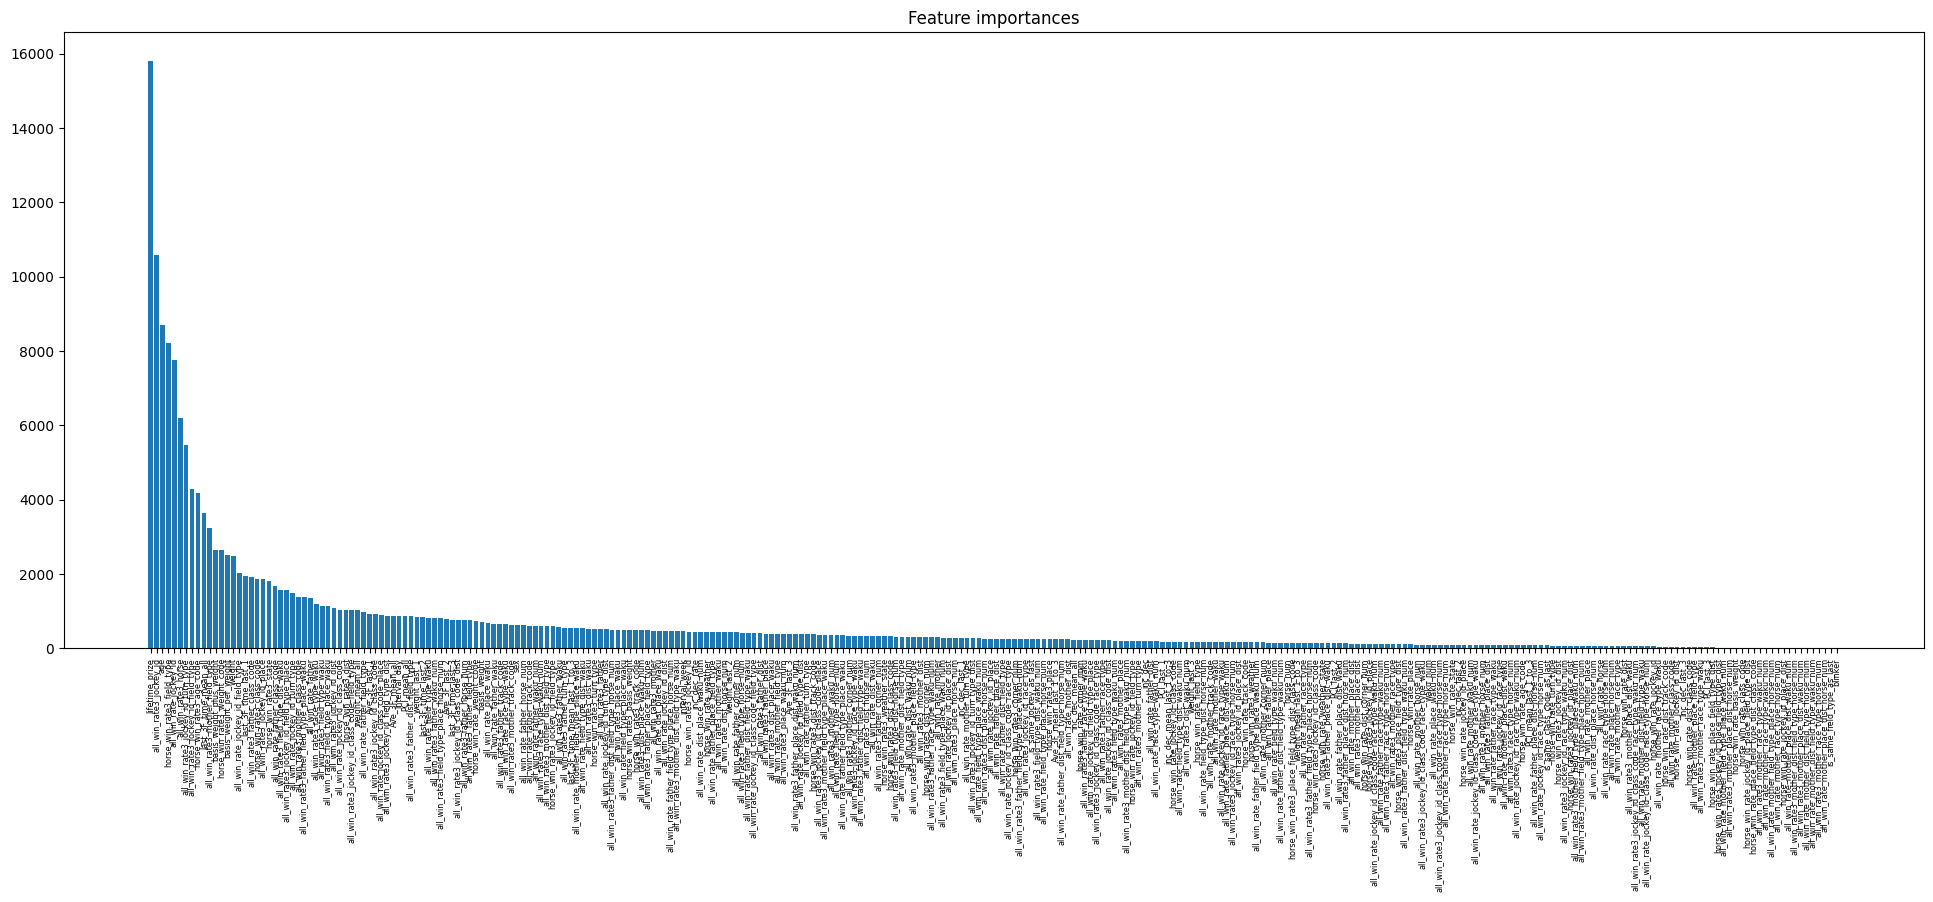

C:\Users\ken20\Documents\workspaces\HORSE_RACING\Modules\model_tuner.py:124: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\ken20\Documents\workspaces\HORSE_RACING\Modules\model_tuner.py:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ken20\Documents\workspaces\HORSE_RACING\Modules\model_tuner.py:125: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

In [9]:
memo = "add last race results, bloods infomation with standardize, in JV dataset. n_rials=50."
model, df_pred = model_tuner.simple_lightGBM(df4, feature_col2, memo=memo, n_trials=10, save_result=False, visualization=True)

In [19]:
tmp =  df_pred[df_pred["class_pred"] == 1][["id_for_fold", "horse", "pred"]].sort_values("pred", ascending=False)
tmp.head(10)

,id_for_fold,horse,pred
9894,2025032306020803,メモリアカフェ,0.678739
48,2025060805030209,ウィクトルウェルス,0.648299
4665,2025050408020404,ダノンジョーカー,0.623057
16274,2025020805010303,アドマイヤデイトナ,0.609458
11951,2025030906020403,エドワードバローズ,0.597154
810,2025060105021203,セブンメデュラス,0.554546
8402,2025040609020407,ペンナヴェローチェ,0.546778
13678,2025022305010801,バーンズベリー,0.544103
2399,2025051804010609,ブルボンクイーン,0.536156
9238,2025033009020206,テーオーエルビス,0.527755


In [11]:
df_pred[df_pred["class_pred"] == 1][["id_for_fold", "horse", "pred"]].tail(10)

,id_for_fold,horse,pred
8594,2025040506030305,アローグレイシャー,0.507851
8402,2025040609020407,ペンナヴェローチェ,0.546778
6948,2025041906030705,リバーバレイト,0.521133
4665,2025050408020404,ダノンジョーカー,0.623057
4496,2025050405020405,アローグレイシャー,0.518479
2935,2025051704010504,ハミルトン,0.523929
2399,2025051804010609,ブルボンクイーン,0.536156
810,2025060105021203,セブンメデュラス,0.554546
48,2025060805030209,ウィクトルウェルス,0.648299
14,2025060805030211,ジャンタルマンタル,0.503491


正規化前の勝率が一番高いメモリアカフェのレース↓

In [25]:
tmp = df_pred[df_pred["id_for_fold"] == 2025032306020803][["horse", "horse_num", "win_odds", "pred"]]
tmp["pred"] = tmp["pred"] / tmp["pred"].sum()
display(tmp.sort_values("pred", ascending=False))

,horse,horse_num,win_odds,pred
9894,メモリアカフェ,1.553797,1.6,0.556949
9898,デアマトローナ,0.836660,15.5,0.087432
9896,オンクラウドナイン,-1.314751,4.8,0.083254
9899,ノイシュタット,-0.836660,5.8,0.056958
9900,リアライズハロック,0.119523,14.6,0.042935
9903,トラストギャロップ,1.075706,181.3,0.030120
9895,ゲンパチルーナ,0.597614,15.7,0.023489
9897,カズナリ,-1.075706,69.8,0.022448
9901,ハルノート,1.314751,83.4,0.021670
9905,ロジジェンス,-0.358569,260.7,0.021375


#### 安田記念↓

In [24]:
tmp = df_pred[df_pred["id_for_fold"] == 2025060805030211][["horse", "horse_num", "win_odds", "pred"]]
tmp["pred"] = tmp["pred"] / tmp["pred"].sum()
display(tmp.sort_values("pred", ascending=False))

,horse,horse_num,win_odds,pred
14,ジャンタルマンタル,0.093659,4.3,0.309616
25,シックスペンス,-1.592196,4.4,0.161584
30,トロヴァトーレ,1.217562,29.6,0.074694
16,ソウルラッシュ,0.655610,3.3,0.068774
23,マッドクール,-1.217562,35.4,0.050762
22,ウォーターリヒト,0.842927,13.0,0.047526
20,エコロヴァルツ,-0.280976,18.8,0.046977
18,ウインマーベル,-1.030244,38.3,0.039075
17,ブレイディヴェーグ,1.592196,9.4,0.035604
21,サクラトゥジュール,0.280976,72.1,0.031356


In [22]:
# 各レースで、一番確率が高い単勝のみ購入した場合の勝ち額
def calc_max_pred_strategy(pred_df):
    pred_df["max_pred"] = pred_df.groupby("id_for_fold", observed=True)["pred"].transform("max")
    pred_df["max_pred_flg"] = pred_df["max_pred"] == pred_df["pred"]
    pred_df["bought_ticket_flg"] = pred_df["max_pred_flg"].astype(int)
    pred_df["bought_and_winning_odds"] = pred_df["bought_ticket_flg"] * pred_df["target"] * pred_df["win_odds"]


    # とりあえず100円賭ける
    total_win = pred_df["bought_and_winning_odds"].sum() * 100  # 払戻額（円単位）
    bought_ticket_sum = pred_df["bought_ticket_flg"].sum()
    total_bet = bought_ticket_sum * 100  # 賭け金（1点100円）
    net_profit = total_win - total_bet

    print(f"購入点数: {bought_ticket_sum}点")
    print(f"払い戻し合計: {total_win:.1f}円")
    print(f"投資額: {total_bet}円")
    print(f"収支: {net_profit:.1f}円")
    print(f"ROI（回収率）: {total_win / total_bet * 100:.2f}%")

calc_max_pred_strategy(df_pred)

購入点数: 1435点
払い戻し合計: 112320.0円
投資額: 143500円
収支: -31180.0円
ROI（回収率）: 78.27%


In [ ]:
# ケリー基準？